Notes or code snippets written while reading and solving problems from
[Concrete Mathematics (2nd edition) by Knuth, Graham, Patashnik](https://www.amazon.com/dp/0201558025)




## Chapter 1 - Recurrent Problems

In [68]:
"""
Josephus Problem 
Implementation of the cyclic bit shift formula on p. 11

Note: only for unsigned integers
"""

def LEN(n):
    r = 0
    while n:
        n >>= 1
        r += 1
    return r

def PR(n,w=4):
    print(bin(n)[2:].zfill(w))

def ROR(n, p, debug=False):
    """
    will rotate n right by p bits and take into account n's length in bits.
    ex1:
    ROR(101101001,1)=
        110110100
    ex2:
    ROR(101101001,3)=
        001101101
    """
    l = LEN(n)
    L = n >> p
    R = (n & (1 << p - 1)) << (l-p)
    F = L | R
    if debug:
        PR(n,w=l)
        PR(L,w=l)
        PR(R,w=l)
        PR(F,w=l)
    return F

def ROL(n, p, debug=False):
    """
    same as ROR, but rotate to left
    """
    l = LEN(n)
    L = (n << p) & ( (1 << l) - 1)
    R = n >> (l-p)
    F = L | R
    if debug:
        PR(n,w=l)
        PR(L,w=l)
        PR(R,w=l)
        PR(F,w=l)
    return F

n = int("101101001", 2)
print("====")
ROL(n,1,debug=True)
n = int("11011101", 2)

print(1<<3)

====
101101001
011010010
000000001
011010011


211

moves=3


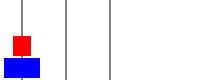

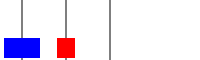

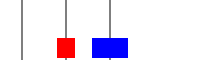

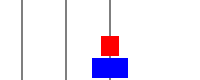

In [3]:
from IPython.display import SVG, display
import drawSvg as draw
import itertools
# 14 colors
cmap=["red","blue","purple","green","aqua","blueviolet","brown","forestgreen","burlywood","chartreuse","cornflowerblue","darkcyan","darkgoldenrod","darkmagenta","orange"]

def drawHanoi(A,B,C):
    # peg height
    pegH = 60
    # peg X offset
    pegO = max(A+B+C)*22
    # ring height and width
    rW,rH = 2*9,20
    width = max(A+B+C) * 100
    height = 40 + ( max(len(A),len(B),len(C)) * rH )
    d = draw.Drawing(width, height,origin=(0,0))
    # stacks
    S=[A,B,C]
    xPeg=pegO/2
    for i in range(1,4):
        # draw pegs
        d.append(draw.Lines(xPeg,0,xPeg,height,close=False,fill='black',stroke='black'))
        # draw stacks
        y=2
        for j in S[i-1]:
            d.append(draw.Rectangle(xPeg-j*(rW/2),y,j*rW,rH, fill=cmap[j-1]))
            y+=rH+2
        xPeg += pegO
    display(SVG(d.asSvg()))


class Towers:
    def __init__(self):
        self.moves = []
    # computes moves required to solve classic Hanoi
    #
    # summary:
    # 1. move n-1 disks from A -> B
    # 2. move the largest disk A -> C
    # 3. move the n-1 disks on top of the largest
    #
    # H(n,A,B,C) means "take n disks from A and move them to C using B"
    def H(self,n,A,B,C,debug=False):
        if n == 0: return
        self.H(n-1,A,C,B,debug=debug)
        self.moves.append(A+C)
        self.H(n-1,B,A,C,debug=debug)
        
    # simulation of problem 2 on page 17
    # same as H but with AC,CA forbidden
    def T(self,n,A,B,C,debug=False):
        if n == 0: return
        self.T(n-1,A,B,C,debug=debug)
        self.moves.append(A+B)
        self.T(n-1,C,B,A,debug=debug)
        self.moves.append(B+C)
        self.T(n-1,A,B,C,debug=debug)

    def draw(self,n,which="H"):
        if which=="H":
            self.H(n,*'ABC',debug=True)
        elif which=="T":
            self.T(n,*'ABC',debug=True)
        print(f"moves={len(self.moves)}")
        # stacks
        S=[list(reversed(range(1,n+1))),[],[] ]
        drawHanoi(S[0],S[1],S[2])
        for m in self.moves:
            a,b=(ord(m[0])-ord('A'),ord(m[1])-ord('A'))
            # perform the actual move
            S[b].append(S[a].pop())
            drawHanoi(S[0],S[1],S[2])
t = Towers()
t.draw(2,which="H")

In [160]:
# problem 7 page 18
from sympy import *
a,b = symbols('\\alpha \\beta')
def Q(n):
    if n == 0: return a
    if n == 1: return b
    if n  > 1: return (1+Q(n-1))/Q(n-2)

for i in range(10):
    display(simplify(Q(i)))

# the sequence is periodic, of period 5

\alpha

\beta

(\beta + 1)/\alpha

(\alpha + \beta + 1)/(\alpha*\beta)

(\alpha + 1)/\beta

\alpha

\beta

(\beta + 1)/\alpha

(\alpha + \beta + 1)/(\alpha*\beta)

(\alpha + 1)/\beta

In [ ]:
# problem 13, page 19 CM

"""
polynomials that Joel mentioned in relation to prob 1.13
p(X) = (#2d) + (#1d)X + (#0d)X^2

where #2d is the number of 2d regions, #1d is the number of lines
and #0d is the number of points.

one transformation was mentioned X -> 2+3*X
"""

from sympy import *
x = symbols('x')
L = [1,2+x,4+4*x+1*x**2,7+9*x+3*x**2]
for p in L:
    if isinstance(p,int):
        print(p)
    else:
        display(expand(p.subs(x,2+3*x)))

In [187]:
# problem 14, page 19 Concrete Mathematics
from sympy import *
n = symbols('n',integer=True)
s1 = n*(n+1)/2
s2 = n*(n+1)*(2*n+1)/6
s1 = s1.subs(n,n-1)
s2 = s2.subs(n,n-1)
P = Rational(1,2) * (s1+s2) + n+1
display(a)
display(P)
P = P.expand()
display(P)
display(together(P))
for k in range(0,7):
    print(k,P.subs(n,k))


n*(n - 1)/2

n*(n - 1)*(2*n - 1)/12 + n*(n - 1)/4 + n + 1

n**3/6 + 5*n/6 + 1

(n**3 + 5*n + 6)/6

0 1
1 2
2 4
3 8
4 15
5 26
6 42


In [185]:
# recursive implementation of the solution in CM 
P=1

def L(n):
    return int(n*(n+1)/2)+1

def P(n):
    if n == 0: return 1
    else: return P(n-1)+L(n-1)

for n in range(1,9):
    print(n,L(n),P(n))


1 2 2
2 4 4
3 7 8
4 11 15
5 16 26
6 22 42
7 29 64
8 37 93


[Reference Link](http://www.gweep.net/~sskoog/block_of_cheese_problem.txt) (related to $P_n$ , the number of regions in 3D after $n$ slices).

For the 2D version, $L_n$ is also called the [Lazy caterer's sequence](https://en.wikipedia.org/wiki/Lazy_caterer%27s_sequence). 

(found out it has a name after talking on discord about it)

In [7]:
# problem 1.16 , recurrence implementation

from sympy import *
a,y,b0,b1 = symbols('\\alpha \\gamma \\beta_0 \\beta_1')
def g(n):
    if n == 1:
        return a
    elif n % 2 == 0:
        n1 = int(n/2)
        return 3*g(n1) + y*n + b0
    else:
        n1 = int((n-1)/2)
        return 3*g(n1) + y*n + b1

    
N = 10
for n in range(1,N):
    gn = g(n)
    c = list(map(lambda _: gn.coeff(_), [a,y,b0,b1]))
    #display(gn)
    print(c)
    

#for n in range(1,N):
#    gn = g(n)
#    display(gn)
    

[1, 0, 0, 0]
[3, 2, 1, 0]
[3, 3, 0, 1]
[9, 10, 4, 0]
[9, 11, 3, 1]
[9, 15, 1, 3]
[9, 16, 0, 4]
[27, 38, 13, 0]
[27, 39, 12, 1]


The initial recurrence is:

$$
g(1)=\alpha \\
g(2n+j)=3\cdot g(n) + \gamma n + \beta_j , j=0,1 \text{ and } n \geq 1 \\
$$

We write the general solution $ g(n) = A(n)\alpha + B(n)\gamma + C(n)\beta_0 + D(n)\beta_1$

If we do this, we get the following recurrences:

$$
\begin{array}{lll}
A(1)=1;B(1)=C(1)=D(1)=0\\
A(2n)&=&3\cdot A(n) \\
A(2n+1)&=&3\cdot A(n) \\
B(2n)&=&3\cdot B(n)+n \\
B(2n+1)&=&3\cdot B(n)+n \\
C(2n)&=&3\cdot C(n)+1 \\
C(2n+1)&=&3\cdot C(n) \\
D(2n)&=&3\cdot D(n) \\
D(2n+1)&=&3\cdot D(n)+1 \\
\end{array}
$$

Suppose we write n in binary and also the prefix $p_j$ :

$$ n=\Delta_0 \cdots \Delta_t $$

$$ p_j = \Delta_0 \cdots \Delta_j , j \leq t $$

The closed-forms should be the following:

$$
\begin{array}{lll}
A(\Delta_0 \cdots \Delta_t) & = & 3^t \\
B(\Delta_0 \cdots \Delta_t) & = & \sum_{k=0}^{t-1} 3^k \cdot p_k \\
C(\Delta_0 \cdots \Delta_t) & = & \sum_{k=0}^{t-1} 3^k \cdot \neg \Delta_{k} \\
D(\Delta_0 \cdots \Delta_t) & = & \sum_{k=0}^{t-1} 3^k \cdot \Delta_{k} \\
\end{array}
$$

___

Note: Talked with Joel about the fact that if $n$ gets replaced with $n^2$ (the last term) in $B(n)$ then $p_k$ will be replaced with $p_k^2$ and in general if a transformation is applied to that $n$ then it should also be applied to $p_k$.  

___



If $n=\Delta_0 \cdots \Delta_t$ then $t=\lfloor{\log_2{n}\rfloor}$







$\large$

The following is a proof by induction for the closed-form of $B(n)$.

The claim is that $B(2^n)=\sum_{k=0}^{n-1} 3^k \cdot 2^{(n-1)-k}$

Proof: 

Base case:

$
B(2^1) = 3B(2^0) + 2^0 = 3\cdot 0 + 2^0 = 1 \\
B(2^2) = \sum_{k=0}^{1} 3^k \cdot 2^{2-1-k} = 2^1 + 3^1 = 5 \\ 
$

Inductive step:

$
B(2^{n+1}) = 3\cdot B(2^n) + 2^n = 3\cdot \sum_{k=0}^{n-1} 3^k \cdot 2^{n-1-k} + 2^n = \sum_{k=0}^{n-1} 3^{k+1} \cdot 2^{n-1-k} + 2^n = \\
\sum_{k=1}^{n} 3^k \cdot 2^{n-1-(k+1)} + 2^n = \sum_{k=0}^n 3^k \cdot 2^{n-k} \blacksquare \\
$

So far, this is the Forward step $P(2^n) \to P(2^{n+1})$ of a [Forward-Backward induction](https://en.wikipedia.org/wiki/Mathematical_induction#Forward-backward_induction) proof.

The remaining (backward) part is a proof for $P(n)\to P(n-1)$.

In [239]:
def A(n):
    t = floor(log(n)/log(2))
    return 3**t

def B(n):
    if n == 1: return 0
    t = floor(log(n)/log(2))
    r = 0
    for k in range(0,t):
        r += 3**k * (n>>k)
    return r

def C(n):
    if n == 1: return 0
    t = floor(log(n)/log(2))
    r = 0
    for k in range(0,t):
        r += 3**k * ((~(n>>k)) & 1)
    return r

def D(n):
    if n == 1: return 0
    t = floor(log(n)/log(2))
    r = 0
    for k in range(0,t):
        r += 3**k * ((n>>k) & 1)
    return r

# g(n) closed form
def g_cf(n):
    if n == 1: return a
    t = floor(log(n)/log(2))
    r = a * (3**t)
    Bn,Cn,Dn=0,0,0
    for k in range(0,t):
        Bn += 3**k * (n>>k)
        Cn += 3**k * ( (~(n>>k)) & 1 )
        Dn += 3**k * ( (n>>k)    & 1 )
    r += Bn * y + Cn * b0 + Dn * b1
    return r

for n in range(1,15):
    #gn = a*A(n)+y*B(n)+b0*C(n)+b1*D(n)
    #display(gn)
    print(n,A(n),B(n),C(n),D(n))
    # display(g_cf(n))


1 1 0 0 0
2 3 2 1 0
3 3 3 0 1
4 9 10 4 0
5 9 11 3 1
6 9 15 1 3
7 9 16 0 4
8 27 38 13 0
9 27 39 12 1
10 27 43 10 3
11 27 44 9 4
12 27 57 4 9
13 27 58 3 10
14 27 62 1 12


In [271]:
def B2(n):
    r = 0
    for k in range(1,n-1):
        r += 3**k * 2**k
    r *= 3
    r += 2**(n-1)
    return r

for n in range(1,5):
    print(n,B(2**n),B2(n))


1 2 1
2 10 2
3 38 22
4 130 134


In [285]:
from sympy import *

# compute B3(n) = B(2^n)
def B3(n):
    return sum(map(lambda k: (3**k) * 2**(n-k), range(n)))

for n in range(1,15):
    print(n,B(2**n),B3(n))

1 2 2
2 10 10
3 38 38
4 130 130
5 422 422
6 1330 1330
7 4118 4118
8 12610 12610
9 38342 38342
10 116050 116050
11 350198 350198
12 1054690 1054690
13 3172262 3172262
14 9533170 9533170


Problem 1.17

$
\large
\begin{array}{lll}
W_{\frac{n(n+1)}{2}} & \leq & 2 \cdot W_{\frac{n(n-1)}{2}} + T_n \\
W_{\frac{n(n-1)}{2} + n} & \leq & 2 \cdot W_{\frac{n(n-1)}{2}} + T_n \\
\end{array}
$

Interpretation:


In [252]:
# problem 1.18 page 19
from sympy import *

n = 3
for j in range(1,n+1):
    n1 = n**(2*j) - n**j - Pow(n,-n)
    n2 = n**(2*j) - n**j
    n3 = n**(2*j)
    print(N(n1),N(n2),N(n3)) 

5.96296296296296 6.00000000000000 9.00000000000000
71.9629629629630 72.0000000000000 81.0000000000000
701.962962962963 702.000000000000 729.000000000000


The coordinates are too large to draw the exact position of the points/lines.

Instead, I'm adding this drawing in Geogebra, which is a diagram of what should happen (probably a skewed version of the actual drawing).

Proof plan:

1. Prove that any new lines added intersect all other previous lines.
2. Prove that any intersection points belong to exactly two lines.



General line equation:

$$
y-y_1 = \frac{y_2-y_1}{x_2-x_1}(x-x_1)
$$

Line equation for $A_j$ ($F_2D_2$ in the image) : 

$$
y-0 = \frac{1-0}{n^{2j}-n^j-n^{2j}}(x-n^{2j}) \\
A_j : y = -\frac{1}{n^j} ( x-n^{2j}) \\
$$

Line equation for $B_j$ ($E_2D_2$ in the image) :

$$
y-0 = \frac{1-0}{n^{2j}-n^j-n^{-n} - n^{2j}}(x-n^{2j}) \\
B_j : y = -\frac{1}{n^j+n^{-n}}(x-n^{2j})\\
$$

The lines $A_i,A_j$ intersect at:

$$
x = \frac{n^{2j+i}-n^{2i+j}}{n^i-n^j} = -n^{i+j}
$$

All other intersections are computed below:

In [358]:
from sympy import *
from sympy import Point

i,j,n,x=symbols('i j n x',integer=True)

def LA(j):
    return -1/n**j * (x-n**(2*j))

def LB(j):
    return -1/(n**j+n**(-n)) * (x-n**(2*j))


# identity or simplify
def F(u):
    return u


# A_i n A_j
xAA = solve(Eq(LA(i),LA(j)),[x])[0]
yAA = LA(i).subs(x,xAA)
pAA=Point(F(xAA),F(yAA))

# B_i n B_j
xBB = solve(Eq(LB(i),LB(j)),[x])[0]
yBB = LB(i).subs(x,xBB)
pBB=Point(F(xBB),F(yBB))

# A_i n B_j
xAB = solve(Eq(LA(i),LB(j)),[x])[0]
yAB = LA(i).subs(x,xAB)
pAB=Point(F(xAB),F(yAB))

display( pAA )
display( pBB )
display( pAB )

Point2D(-n**(i + j), -(-n**(2*i) - n**(i + j))/n**i)

Point2D((-n**i - n**j - n**(i + j + n))/n**n, -(-n**(2*i) + (-n**i - n**j - n**(i + j + n))/n**n)/(n**i + n**(-n)))

Point2D((n**(2*i) - n**(i + 2*j + n) + n**(2*i + j + n))/(-n**(i + n) + n**(j + n) + 1), -(-n**(2*i) + (n**(2*i) - n**(i + 2*j + n) + n**(2*i + j + n))/(-n**(i + n) + n**(j + n) + 1))/n**i)

In [313]:
# Note: for the above the x's existing are enough to prove all lines intersect.
# It's just the denominators that need to be nonzero.
#
# To prove that the intersections are shared by exactly two lines,
# I'd have to prove that the intersection point does not belong to a 3rd line k.

In [354]:
# If there are 3 lines L_i,L_j,L_k (with 1 <= i \neq j \neq k <= n)
# and if L_i n L_j = P then P \notin L_k.
# (hopefully can be proved via contradiction)
k = symbols('k',integer=True)
px = []
py = []
for xP,yP in [[xAA,yAA],[xBB,yBB],[xAB,yAB]]:
    y1 = LA(k).subs(x,xP)
    eq = Eq(yP,y1)
    display(solve(eq,[k]))


[i, j]

[log((-sqrt(-(4*n**i + 4*n**j + 4*n**(i + j + n) - exp((2*i + n)*log(n)) - exp((2*j + n)*log(n)) - 2*exp((i + j + n)*log(n)))*exp(n*log(n))) + (exp(i*log(n)) + exp(j*log(n)))*exp(n*log(n)))*exp(-n*log(n))/2)/log(n),
 log((sqrt(-(4*n**i + 4*n**j + 4*n**(i + j + n) - exp((2*i + n)*log(n)) - exp((2*j + n)*log(n)) - 2*exp((i + j + n)*log(n)))*exp(n*log(n))) + (exp(i*log(n)) + exp(j*log(n)))*exp(n*log(n)))*exp(-n*log(n))/2)/log(n)]

[(log((-n**n*(n**i - n**j)*(n**i + n**j) + sqrt(n**(4*i + 2*n) + n**(4*j + 2*n) - 2*n**(2*i + 2*j + 2*n) + 4*exp(2*i*log(n)) - 4*exp((3*i + n)*log(n)) + 8*exp(2*(i + j + n)*log(n)) - 4*exp((i + 2*j + n)*log(n)) - 4*exp((i + 3*j + 2*n)*log(n)) + 8*exp((2*i + j + n)*log(n)) - 4*exp((3*i + j + 2*n)*log(n))))/(-exp((i + n)*log(n)) + exp((j + n)*log(n)) + 1)) - log(2))/log(n),
 (log((-n**(2*i + n) + n**(2*j + n) - sqrt(n**(4*i + 2*n) + n**(4*j + 2*n) - 2*n**(2*i + 2*j + 2*n) + 4*exp(2*i*log(n)) - 4*exp((3*i + n)*log(n)) + 8*exp(2*(i + j + n)*log(n)) - 4*exp((i + 2*j + n)*log(n)) - 4*exp((i + 3*j + 2*n)*log(n)) + 8*exp((2*i + j + n)*log(n)) - 4*exp((3*i + j + 2*n)*log(n))))/(-exp((i + n)*log(n)) + exp((j + n)*log(n)) + 1)) - log(2))/log(n)]

SymPy doesn't know how to simplify these.

Only the first pair is useful here, the other two should be the same but given that they can't be simplified, this is a dead end.

Read the solution at the back of the book.

It mainly relies on the following:

$$ n^k+n^j-1 < \frac{n^{2k}-n^{2j}}{n^k-n^j+\Delta} < n^k+n^j+1 \hspace{0.4cm} \text{ with } \Delta \in \{n^{-n},0,-n^{-n}\} $$

$$ j,k,n\in \mathbb{N} \text{ and } 1 \leq j\neq k \leq n$$


In [436]:
# Numerical verification of said inequality

from sympy import *
from IPython.display import Math, display

i,j,n,k,x=symbols('i j n k x',integer=True)

def d3(P):
    f = latex(P[0]) + ' < ' + latex(P[1]) + ' < ' + latex(P[2])
    # print(f)
    display(Math(f))

N=n**(2*k)-n**(2*j)
D=n**k-n**j+n**(-n)
L=n**j+n**k-1
R=n**j+n**k+1

P=[L,N/D,R]

for n_ in range(4,10):
    if n_ != 6: continue
    for j_ in range(1,n_):
        for k_ in range(1,n_):
            if j_ != k_:
                P0 = P[0].subs({n: n_,j: j_,k: k_}).evalf()
                P1 = P[1].subs({n: n_,j: j_,k: k_}).evalf()
                P2 = P[2].subs({n: n_,j: j_,k: k_}).evalf()
                print((P0<P1 and P1<P2),P0,P1,P2)



True 41.0000000000000 41.9999699931627 43.0000000000000
True 221.000000000000 221.999977341762 223.000000000000
True 1301.00000000000 1301.99997836715 1303.00000000000
True 7781.00000000000 7781.99997853343 7783.00000000000
True 41.0000000000000 42.0000300068802 43.0000000000000
True 251.000000000000 251.999969993145 253.000000000000
True 1331.00000000000 1331.99997734176 1333.00000000000
True 7811.00000000000 7811.99997836715 7813.00000000000
True 221.000000000000 222.000022658243 223.000000000000
True 251.000000000000 252.000030006862 253.000000000000
True 1511.00000000000 1511.99996999314 1513.00000000000
True 7991.00000000000 7991.99997734176 7993.00000000000
True 1301.00000000000 1302.00002163285 1303.00000000000
True 1331.00000000000 1332.00002265824 1333.00000000000
True 1511.00000000000 1512.00003000686 1513.00000000000
True 9071.00000000000 9071.99996999314 9073.00000000000
True 7781.00000000000 7782.00002146657 7783.00000000000
True 7811.00000000000 7812.00002163285 7813.0000

In [438]:
#failed attempt at proving it step-by-step
P=[L,N/D,R]

d3(P)
P=list(map(lambda _: _ - (n**j+n**k), P))
d3(P)
P[1] = simplify(P[1])
d3(P)
#P=list(reversed(list(map(lambda _: _ * (n**(j+n) - n**(k+n) - 1) , P))))
#d3(P)



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Dead end**


Rewrite the initial expression like this:
    
$$ 
E=\frac{a^{2}-b^{2}}{a-b+c}=\left(a+b\right)\left(\frac{1}{1+\frac{c}{a-b}}\right)= \\
=\left(a+b\right)\left(\frac{1}{1-\frac{c}{b-a}}\right)\\
\\
a=n^{k}\\
b=n^{j}\\
c=n^{-n}\\
$$

Expand using infinite geometric series:

$$
E=(a+b)\left(1+\left(\frac{c}{b-a}\right)^1 + \left(\frac{c}{b-a}\right)^2 + \left(\frac{c}{b-a}\right)^3 + \cdots \right)
$$

In [440]:
# failed attempt using sympy

P=[L,N/D,R]
d3(P)
P=list(map(lambda _: expand(_*D), P))
d3(P)
P=list(map(lambda _: _ - N , P))
d3(P)
P=list(map(lambda _: _ - (n**j * n**(-n) + n**k * n**(-n)) , P))
d3(P)
P=list(map(lambda _: powsimp(_) , P))
d3(P)
P=list(map(lambda _: simplify(_ / D) , P))
d3(P)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Solution** (due to snow from discord):

Transcribing their solution from my notebook.

Assume that $k>j$ and $n \geq 2$

For the second side:

$$
\begin{aligned}
& \frac{ n^{2k} - n^{2j} }{ n^k - n^j - n^{-n}} \leq n^k + n^j + 1 \iff n^{2k} - n^{2j} \leq (n^k - n^j - n^{-n})(n^k + n^j + 1) \iff \\
& 0 \leq (n^k - n^j - n^{-n})(n^k + n^j + 1) - n^{2k} - n^{2j}  \\
& 0 \leq n^k-n^j-(n^{j-n}+n^{k-n} + n^{-n}) \\
& 0 \leq \underbrace{ (n^k-n^j) }_{\geq 2}-\underbrace{ \frac{n^j+n^k+1}{n^n} }_{< 2} \\
& \\
\end{aligned}
$$

Proving the two claims above:

$$
\begin{aligned}
& n^k-n^j = n^j(n^{k-j}-1)\geq n^j(n-1) \geq 2^j (2-1) \geq 2 \\
& 1+n^j+n^k \leq n^j+n^j+n^k = 2n^j+n^k \leq n^{k-j}n^j + n^k \leq 2n^k \\
& \frac{1+n^j+n^k}{n^n} \leq \frac{2n^k}{n^n} = 2 \cdot \frac{1}{n^{n-k}} \leq 2\\
\end{aligned}
$$


Proving the first side:

$$
\begin{aligned}
& n^k+n^j-1 < \frac{ n^{2k} - n^{2j} }{ n^k - n^j + n^{-n}} \\
& 0 \geq (n^k+n^j-1)(n^k-n^j+n^{-n})-n^{2k}+n^{2j} \\
& 0 \geq n^{2k}-n^{j+k}+n^{k-n}+n^{j+k} -n^{2j}+n^{j-n}-n^{k}+n^j-n^{-n}-n^{2k}+n^{2j} \\
& 0 \geq -n^k+n^j+(n^{k-n} + n^{j-n} - n^{-n} ) \\
& 0 \geq \underbrace{-(n^k-n^j)}_{\leq -2} + \underbrace{\frac{n^k+n^j-1}{n^n}}_{<2} \blacksquare \\
\end{aligned}
$$



In [446]:
# problem 1.20 , recurrence implementation

from sympy import *
a,y0,y1,b0,b1 = symbols('\\alpha \\gamma_0 \\gamma_1 \\beta_0 \\beta_1')
def h(n):
    if n == 1:
        return a
    elif n % 2 == 0:
        n1 = int(n/2)
        return 3*h(n1) + y0*n + b0
    else:
        n1 = int((n-1)/2)
        return 3*h(n1) + y1*n + b1

N = 20
for n in range(1,N):
    hn = h(n)
    c = list(map(lambda _: hn.coeff(_), [a,y0,y1,b0,b1]))
    #display(gn)
    print(c)

[1, 0, 0, 0, 0]
[3, 2, 0, 1, 0]
[3, 0, 3, 0, 1]
[9, 10, 0, 4, 0]
[9, 6, 5, 3, 1]
[9, 6, 9, 1, 3]
[9, 0, 16, 0, 4]
[27, 38, 0, 13, 0]
[27, 30, 9, 12, 1]
[27, 28, 15, 10, 3]
[27, 18, 26, 9, 4]
[27, 30, 27, 4, 9]
[27, 18, 40, 3, 10]
[27, 14, 48, 1, 12]
[27, 0, 63, 0, 13]
[81, 130, 0, 40, 0]
[81, 114, 17, 39, 1]
[81, 108, 27, 37, 3]
[81, 90, 46, 36, 4]


TODO: Review basic inequalities problems
 
Review repertoire method in the book
- DONE read it from at least one source
- TODO read it from multiple sources
- TODO write a summary in the notes here
 
Reading list for repertoire method:
- [link1](https://math.stackexchange.com/q/67939) (done)
- [link2 (general procedure)](https://math.stackexchange.com/q/1017498) (in-progress)
- [link3 (blog)](https://ftclausen.github.io/mathematics/concrete-mathematics/cm-repertoire-method/) (to read)
- [link4 (blog)](https://dangkhoasdc.github.io/en/post/2017/12/26/the-repertoire-method/)
- [link5 (blog)](https://web.archive.org/web/20210509223555/https://blog.wakatta.jp/blog/2012/01/14/concrete-mathematics-repertoire-method/)
- [link6 (blog)](https://flopska.com/the-repertoire-method-and-the-radix-based-solution-to-the-josephus-problem.html)
- [Mathematics for the Analysis of Algorithms (by Knuth & Green)](/home/user/books/depo/combinatorics/algorithms/(Progress%20in%20Computer%20Science%20and%20Applied%20Logic)%20Daniel%20H.%20Greene,%20Donald%20E.%20Knuth%20-%20Mathematics%20for%20the%20Analysis%20of%20Algorithms-Birkh%C3%A4user%20Boston%20(1990).pdf) (repertoire method)

# Chapter 2 - Sums

### Iverson brackets and sum identities

[Iverson bracket wiki page](https://en.wikipedia.org/wiki/Iverson_bracket#Properties)

[Blog post about Iverson bracket](https://ozaner.github.io/iverson-bracket/)

Property 1 (Double-counting): 

$$ [k \in K] + [k\in K'] = [k\in K \cap K'] + [k\in K \cup K'] $$

Property 2 (Interchanging order of summation):

$$ \sum_{j} \sum_{k} a_{j,k} [P(j,k)] = \sum_{P(j,k)} a_{j,k} = \sum_{k} \sum_{j} a_{j,k} [P(j,k)] $$

Property 3 (Interchanging summation order **vanilla version** ):

$$ \sum_{j\in J} \sum_{k\in K} a_{j,k} = \sum_{j\in J\\k\in K} a_{j,k} = \sum_{k\in K} \sum_{j\in J} a_{j,k} $$

Property 4 (Interchanging summation order **rocky road version** ):

$$ \sum_{j\in J} \sum_{k\in K(j)} a_{j,k} = \sum_{k\in K'} \sum_{j\in J'(k)} a_{j,k} $$

where the following relation exists between $J,K(j),K',J'(k)$ :

$$ [j\in J][k\in K(j)] = [k\in K'][j\in J'(k)] $$

Property 5 (application of rocky road):

$$ \boxed{ [1\leq j \leq n] [j\leq k \leq n] = [1\leq j \leq k \leq n] = [1 \leq k \leq n] [1\leq j \leq k] } $$

and the equivalent double-sum identity:

$$ \sum_{j=1}^{n} \sum_{k=j}^n a_{j,k} = \sum_{1\leq j\leq k\leq n} a_{j,k} =\sum_{k=1}^{n} \sum_{j=1}^k a_{j,k} $$


Property 6 (**General distributive law**):

$$ \sum_{j\in J \\k\in K} a_j b_k = \left( \sum_{j\in J} a_j \right)\left( \sum_{k\in K} a_k \right) $$


Sidenote ([symbol table](https://en.wikipedia.org/wiki/Geometric_Shapes_(Unicode_block))):

$$
\begin{array}{|c|c|}
\hline
\text{Upper/Lower regions without diagonal} & \unicode{0x25F9},\unicode{0x25FA} \\
\hline
\text{Upper/Lower triangular regions with diagonal} & \unicode{0x25E5},\unicode{0x25E3} \\
\hline
\text{Full square} & \unicode{0x25A0} \\
\hline
\text{Square without main diagonal} & \unicode{0x25A1} \\
\hline
\end{array}
$$

Property 7:

$$ [1\leq j\leq k\leq n] + [1\leq k\leq j \leq n] = [1\leq j,k \leq n] + [1\leq j=k \leq n] $$

Interpretation: $\unicode{0x25E5} + \unicode{0x25E3} = \unicode{0x25A0} + diagonal$

Property 8:

$$ [1\leq j < k \leq n] + [1\leq k < j \leq n] = [1\leq j,k\leq n] - [1\leq j=k\leq n] $$

Interpretation: $\unicode{0x25F9} + \unicode{0x25FA} = \unicode{0x25A0} - diagonal = \unicode{0x25A1}$

---

### Various identities or inequalities

$$ \left(\sum_{k=1}^n a_k \right) \left(\sum_{k=1}^n b_k \right) = n \sum_{k=1}^n a_k b_k - \sum_{1\leq j<k \leq n} (a_k - a_j)(b_k-b_j)$$

$$  \left(\sum_{k=1}^n a_k \right) \left(\sum_{k=1}^n b_k \right) \leq n \sum_{k=1}^n a_k b_k \text { if } a_1\leq a_2 \leq \cdots \leq a_n \text{ and }  b_1\leq b_2 \leq \cdots \leq b_n $$

$$  \left(\sum_{k=1}^n a_k \right) \left(\sum_{k=1}^n b_k \right) \geq n \sum_{k=1}^n a_k b_k \text { if } a_1\leq a_2 \leq \cdots \leq a_n \text{ and }  b_1\geq b_2 \geq \cdots \geq b_n $$



**Problem 2.4**

$$[1\leq i < j < k \leq 4] = [1 < j < k \leq 4] [1\leq i<j] = [1<k\leq 4][1<j<k][1\leq i<j]$$

$$[1\leq i < j < k \leq 4] = [1 < i < j < 4] [j<k\leq 4] = [1\leq i < 4][i<j<4][j<k\leq 4]$$

$$
\begin{aligned}
\sum_{1\leq i < j < k \leq 4} a_{i,j,k} & = \\
\sum_{k=2}^4 \sum_{j=1}^{k-1} \sum_{i=1}^{j-1} a_{i,j,k} & = \\
\sum_{i=1}^{3} \sum_{j=i+1}^{3} \sum_{k=j+1}^4 a_{i,j,k} &  \\
\end{aligned} \\
$$

In [24]:
N=4
P={}
c = 0
for i in range(1,N+1):
    for j in range(1,N+1):
        for k in range(1,N+1):
            if 1<=i<j<k<=N:
                print((i,j,k))
                c+=1
print("== items: {0}".format(c))
c = 0
for k in range(2,N+1):
    for j in range(2,k):
        for i in range(1,j):
            print((i,j,k))
            c+=1
print("== items: {0}".format(c))            
c = 0
for i in range(1,N):
    for j in range(i+1,N):
        for k in range(j+1,N+1):
            print((i,j,k))
            c+=1
print("== items: {0}".format(c))

(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)
== items: 4
(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)
== items: 4
(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)
== items: 4


**Problem 2.6**:

$[1\leq j\leq k\leq n] = [1\leq j\leq n][j\leq k \leq n]$

$
\begin{aligned}
f(j,n) = & \sum_{k} [1\leq j \leq k \leq n] = & \\
         & \sum_{k} [1\leq j\leq n][j\leq k \leq n] = & \\
         & [1\leq j\leq n] \sum_{k} [j\leq k \leq n] = & \\
         & [1\leq j\leq n] \sum_{j=k}^n 1 = & \\
         & [1\leq j\leq n](n-j+1) & \\
\end{aligned}
$

We factor out the term that depends on $j,n$ and evaluate the remaining sum. 

Discussed the transition between pages 40 and 41.
Asked on discord and on [math.stackexchange](https://math.stackexchange.com/q/4599818/68328).

In [21]:
# problem 2.7 
from sympy import *
m = symbols('m',integer=True)
x = symbols('x')
def nabla(f):
    return f - f.subs(x,x-1)

for i in (rf, ff, factorial, binomial, gamma):
    U = nabla(rf(x,m))
    display(simplify(U).rewrite(i))

m*gamma(m + x - 1)/gamma(x)

m*gamma(m + x - 1)/gamma(x)

m*factorial(m + x - 2)/factorial(x - 1)

m*gamma(m + x - 1)/gamma(x)

m*gamma(m + x - 1)/gamma(x)

In [ ]:
# The rewriting rules in SymPy could use some improvements for rf/ff

**Problem 2.7**

$$
\begin{aligned}
&\Delta f(x) = f(x+1)-f(x)\\
&\nabla f(x) = f(x)-f(x-1)\\
&\nabla f(x) = \Delta f(x-1)\\
&\nabla x^{\overline{m}} = \Delta (x-1)^{ \overline{m} } = x^{\overline{m}} - (x-1)^{\overline{m}} = \\
&\frac{(x+m-1)!}{(x-1)!} - \frac{(x+m-2)!}{(x-2)!} = \\
      & x \cdot (x+1) \cdot \cdots \cdot (x+m-2) \cdot (x+m-1) - \\
(x-1) & x \cdot (x+1) \cdot \cdots \cdot (x+m-2) = \\
& x \cdot (x+1) \cdot \cdots \cdot (x+m-2) ( (x+m-1) - (x-1) ) = \\
& \left( x \cdot (x+1) \cdot \cdots \cdot (x+m-2) \right) \cdot m = x^{\overline{m-1}} \cdot m\\
\end{aligned}
$$



**Problem 2.8**

$$
\begin{aligned}
&x^{\overline{m}}=x\cdot(x+1)\cdot \cdots \cdot (x+m-1)\\
&0^{\overline{m}}=0\cdot(0+1)\cdot \cdots \cdot (x+m-1)=0, \text{ for } m\geq 1\\
\end{aligned}
$$

The same type of reasoning from page 52 can be applied:

$$
\begin{aligned}
x^{\overline{m+1}} & = & x\cdot(x+1)\cdot \cdots \cdot & (x+m-1) \cdot (x+m) & \\
x^{\overline{m}}   & = & x\cdot(x+1)\cdot \cdots \cdot & (x+m-1) & \\
\end{aligned}
$$

So to go from $x^{\overline{m+1}} \to x^{\overline{m}}$ we multiply by $\frac{1}{x+m}$

$$
0^{\overline{m}} = \frac{1}{(-1)^m \cdot (-m)!} \text{ for } m \leq 0
$$


**Problem 2.9**

$$
\large
\left.
\begin{array}{l}
x^{\overline{m+n}}   & = & \frac{(x+m+n-1)!}{(x-1)!}\\
(x+m)^{\overline{n}} & = & \frac{(x+m+n-1)!}{(x+m-1)!}\\
x^{\overline{m}}     & = & \frac{(x+m-1)!}{(x-1)!}\\
\end{array}
\right\} \implies x^{\overline{m+n}} = (x+m)^{\overline{n}} \cdot x^{\overline{n}}\\
\\
\text{For } m=-n \text{ we have }\\
\large
x^{\overline{-n+n}} = x^{\overline{0}} = 1 = (x-n)^{\overline{n}} \cdot x^{\overline{-n}} \iff
x^{\overline{-n}} = \frac{1}{(x-n)^{\overline{n}}} 
$$


In [6]:
# problem 2.12
n=10
A=list(range(-n,n+1))
c=3
B=list(map(lambda k: k+(-1)**(k%2) * c,A))
print(A)
print(B)


[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[-7, -12, -5, -10, -3, -8, -1, -6, 1, -4, 3, -2, 5, 0, 7, 2, 9, 4, 11, 6, 13]


In [ ]:
####### \tiny{ }, \scriptsize{ }, \small{ }, \normal{ }, \large{ }, \Large{ }, \LARGE{ }, \huge{ }, \Huge{ }


**Problem 2.12**


$
p(k) = k + (-1)^k \cdot c
\begin{cases}
k+c& k \equiv 0 (mod\ 2)  \\
k-c& k \equiv 1 (mod\ 2)& \\
\end{cases}
$

Because $p(k)$ is a permutation it's supposed to be a bijection, so at least injective.

Casework on parity of $a,b$ to disprove injectivity.

Assume $a,b\in \mathbb{Z} \text{ with } a\neq b$

$
\begin{array}{|l|l|l|}
\hline
a (mod\ 2) & b (mod\ 2) & p(a)=p(b) \\
\hline
1 & 1 & a-c=b-c\implies a=b \bot \\
\hline
0 & 0 & a+c=b+c\implies a=b \bot \\
\hline
1 & 0 & a-b=2c \implies 1\equiv 0 (mod\ 2) \bot \\
\hline
0 & 1 & a-b=-2c \implies 1\equiv 0 (mod\ 2) \bot \\
\hline
\end{array}
$

**Problem 2.13**

$$
\require{cancel}
\newcommand{\floor}[1]{\left \lfloor #1 \right \rfloor}
\newcommand{\ceil}[1]{\left \lceil #1 \right \rceil}
\newcommand{\ndiv}[1][]{ \floor{ \frac{n}{2} } }
\newcommand{\na}[1][]{ (-1)^n }
\newcommand{\nb}[1][]{ (-1)^{n-1} }
\newcommand{\nc}[1][]{ \bbox[yellow]{\unicode{0x25EF}} }
\newcommand{\nd}[1][]{ \bbox[orange]{\unicode{0x25EF}} }
$$

Trying to apply the repertoire method (page 44) according to the solution:

$$
\begin{align}
& R_0 = \alpha \tag{1} \\
& R_n = R_{n-1} + \na (n^0 \beta + n^1 \gamma + n^2\delta) \tag{2} \\
& R_n = A(n)\alpha + B(n)\beta + C(n)\gamma + D(n) \delta \tag{3} \\
\end{align}
$$

With (1) being the initial condition, (2) the recurrence relation and (3) the solution in general form.

If we unroll (2) we get:

$$
R_n = \alpha + \left( \sum_{k=0}^n (-1)^k n^0 \right) \beta + \left( \sum_{k=0}^n (-1)^k n^1 \right) \gamma + \left( \sum_{k=0}^n (-1)^k n^2 \right) \delta \tag{4}
$$

By (3) and (4) we have:

$$
\begin{align}
& A(n) = \alpha \\
& B(n) = \left( \sum_{k=1}^n (-1)^k n^0 \right) \\
& C(n) = \left( \sum_{k=1}^n (-1)^k n^1 \right) \\
& D(n) = \left( \sum_{k=1}^n (-1)^k n^2 \right) \\
\end{align}
$$

It's $D(n)$ that the problem is asking for.

The repertoire will be the following set of functions: $\{1,\na,\na n,\na n^2\}$.

Setting $R_n=1$ $ \implies \alpha=1,\beta=\gamma=\delta=0 \implies \boxed{A(n) = 1}$

Setting $R_n= \na \implies$ the following:

$
\begin{align}
& \na = \nb + \na (\beta + n\gamma + n^2\delta) \iff \\
& 1 = -1 + (\beta + n\gamma + n^2 \delta) \iff \\
& 2 = \beta + n\gamma + n^2 \delta \iff \\
&\\
&\\
&n=0 \implies \alpha=1,\beta=2\\
&n=1 \implies \beta + \gamma + \delta = 2 \implies \gamma+\delta=0\\
&n=2 \implies \beta + 2\gamma + 4\delta = 2 \implies 2 + 2\delta=2 \implies \delta = 0,\gamma=0\\
&(\alpha,\beta,\gamma,\delta)=(1,2,0,0) \overset{\mbox{ (3) }}{\implies} \na = 1+2B(n) \implies \boxed{B(n)=\frac{\na - 1}{2}}
\end{align}
$

Setting $R_n= \na n $ leads to

$
\begin{align}
& \na n = \nb (n-1) + \na (\beta + n\gamma + n^2\delta) \\
& n = -(n-1) + (\beta + n\gamma + n^2 \delta) \\ 
& 2n-1 = \beta + n\gamma + n^2 \delta \\
& n=0 \implies -1 = \beta \\
& n=1 \implies 1 = \beta + \gamma + \delta \implies \gamma + \delta = 2\\
& n=2 \implies 3 = \beta + 2\gamma + 4\delta \implies \delta = 0,\gamma=2\\
& (\alpha,\beta,\gamma,\delta)=(0,-1,+2,0) \overset{\mbox{ (3) }}{\implies} \na = -B(n) + 2C(n) \implies \boxed{C(n) = \frac{\na + B(n)}{2}}
\end{align}
$

Setting $R_n = \na n^2 $ leads to

$
\begin{align}
& \na n^2 = \nb (n-1)^2 + \na (\beta + n\gamma + n^2\delta) \\
& n^2 = -(n-1)^2 + \beta + n\gamma + n^2 \delta \\
& 2n^2-2n+1=\beta+n\gamma+n^2\delta\\
& n=0 \implies 1 = \beta\\
& n=1 \implies 1 = \beta + \gamma + \delta \implies \gamma+\delta=0\\
& n=2 \implies 5 = 1 + 2\delta \implies \delta = 2,\gamma=-2\\
& (\alpha,\beta,\gamma,\delta)=(0,1,-2,2) \overset{\mbox{ (3) }}{\implies} \na n^2 = B(n)-2C(n)+2D(n) \implies\\
& \boxed{ D(n) = \na\frac{n^2+n}{2}} \\
\end{align}
$


**Proof #2**

This problem asks to compute a closed-form for the following sum:

$$
\sum_{k=0}^n (-1)^k k^2
$$

For $n=2t$ we have:

$$
S_n=S_{2t}=\sum_{k=0}^n (-1)^k k^2 = \sum_{k=0}^{\bbox[orange]{t}} (2k)^2 - \sum_{k=0}^{\bbox[yellow]{t-1} } (2k+1)^2 = \\
n^2 + \sum_{k=0}^{t-1} \bcancel{(2k)^2} - \sum_{k=0}^{t-1} (\bcancel{(2k)^2} + 4k + 1) = \\
n^2 - 4 \sum_{k=0}^{t-1} k - \sum_{k=0}^{t-1} 1 = n^2 - 4 \frac{t(t-1)}{2} - t = n^2 - 2t(t-1) - t = \\
n^2 - n\left(\frac{n}{2} - 1\right) - \frac{n}{2} = \boxed{ \frac{n^2+n}{2} }
$$

The $\bbox[yellow]{t-1}$ bound above is a bit counter-intuitive, probably best illustrated through an example, $n=6$ :

$$
\begin{array}{|c|c|c|c|c|}
\hline
1 & 2 & 3 & 4 & 5 & 6 \\
\hline
\nc &\nd & \nc &\nd & \nc & \nd\\
\hline
\end{array}
$$

For the other case, $n=2t+1$

$$
S_{2t+1} = S_{2t} - (2t+1)^2 = \frac{(2t)^2 + 2t}{2} - (2t+1)^2 = -\frac{4t^2+6t+2}{2} = \boxed{ -\frac{n^2+n}{2} }
$$

We conclude that in general $\large S_n=(-1)^n \frac{n^2+n}{2}$.

**Problem 2.14**

Using the property 2.31 for the Iverson bracket (aka property 5 in the above)

$$
\begin{aligned}
& \sum_{k=1}^n k 2^k = \sum_{k=1}^n \sum_{j=1}^k 2^k = \\
& \sum_{1\leq j\leq k\leq n} 2^k = \sum_{j=1}^n \sum_{k=j}^k 2^k = \\
& \sum_{j=1}^n \left[(2^1+\cdots + 2^n) - (2^1+\cdots + 2^{j-1}) \right] = \\
& \sum_{j=1}^n \left[ (2^{n+1}-2) - (2^j - 2) \right] = \\
& \sum_{j=1}^n (2^{n+1} - 2^j) = n\cdot 2^{n+1} - (2^{j+1}-2) = (n-1)2^{n+1} + 2.
\end{aligned}
$$

In [85]:
# problem 2.15 : verification

Cn = n*(n+1)/2
Bn = n*(n+1)*(2*n+1)/6
An = Cn**2

R = Rational

V = R(3,4) * (n*Bn + R(1,2)*Bn - R(1,6)*Cn )

display(V.expand())
display(An.expand())


n**4/4 + n**3/2 + n**2/4

n**4/4 + n**3/2 + n**2/4

**Problem 2.14**

**Proof 1**

Using rocky-road interchange (2.32 in the book) , then the closed-form for sum of squares (which was determined previously). In short, reducing $A_n$ to an expression in $B_n,C_n$.

$$
\begin{align}
& \text{Let } A_n=\sum k^3 , B_n=\sum k^2 , C_n = \sum k\\
& \\
& A_n = \sum_{k=1}^n k^3 = \sum_{1\leq j\leq k\leq n} k^2 = \\
& \sum_{1\leq j\leq n} \sum_{j\leq k\leq n} k^2 = \\
& \sum_{1\leq j\leq n} (B_n - B_{j-1}) = n B_n - \sum_{1\leq j \leq n} B_{j-1} = \\
& n B_n - \sum_{j=1}^{n} B_{j-1} = n B_n - \sum_{j=1}^{n} \frac{j(j-1)(2j-1)}{6} = \\
& n B_n - \frac{1}{6} (2 \sum_{j=1}^{n} j^3 - 3\sum_{j=1}^{n} k^2 + \sum_{j=1}^{n} j) = \\
& n B_n - \frac{1}{6} (2 A_{n} - 3 B_{n} + C_{n}) \\
& \\
& A_n = \frac{3}{4} \left( n B_n + \frac{1}{2} B_{n} - \frac{1}{6} C_{n}) \right) \\
& A_n = \left(\frac{n(n+1)}{2}\right)^2\\
\end{align}
$$


**Proof 2**:

$$
\begin{align}
& A_n + B_n = \sum k^3 + \sum k^2 = \sum k^2 (k+1) = \\
& \sum k \cdot k(k+1) \overset{\mbox{ (hint) }}{=} 2 \sum k \cdot \sum j \overset{\mbox{ (2.28) }}{=} \\
& 2\cdot \sum_{1\leq j\leq k\leq n} j\cdot k \overset{\mbox{ (2.33) }}{=} \sum k^2 + \left( \sum k \right)^2 = \\
& \\
& A_n + B_n = B_n + \left( \sum k \right)^2 \\
& A_n = \left( \sum k \right)^2 \\
\end{align}
$$

**Problem 2.16**: Follows by applying (2.52) with exponent $m+n$ and $n+m$ and dividing both sides by $(x-m)^{\underline{n}} \cdot (x-n)^{\underline{m}} $

**Problem 2.18**

$$
\sum_{k\in F} |a_k| = \sum_{k\in F} |Re(a_k) + Im(a_k)| \leq \sum_{k\in F} (|Re(a_k)| + |Im(a_k)|) \leq B_{re} + B_{im}
$$

**Problem 2.20**

$$
\begin{align}
& S_n = \sum_{k=0} k H_k \\
& S_n + (n+1) H_{n+1} = \sum_{k=0}^{n+1} k H_k = \sum_{k=0}^{n} (k+1) H_{k+1} = \\
& t \\
\end{align}
$$

